In [1]:
from ordplan import ORD
from ga import GA 
from lp import LP

#roll_paper = [68, 73, 75, 79, 82, 85, 88, 91, 95, 97]
#deadline_scope = เลขrowกำหนดส่งที่จะยึดใช้ ex 0 = 5/1/2023
#deadline = จะยึดจาก scope หรือไม่ ถ้า False คือเอาทั้งหมดเลย
orders = ORD("data/true_ordplan.csv",deadline_scope=0).get(deadline=False)
orders

,เลขที่ใบสั่งขาย,กำหนดส่ง,แผ่นหน้า,ลอน C,แผ่นกลาง,ลอน B,แผ่นหลัง,จำนวนชั้น,ตัดกว้าง,ตัดยาว,จำนวนสั่งขาย,ประเภททับเส้น
0,x25769,5/1/2023,CM127,CM127,CM127,CM127,CM127,5,11.6142,44.0945,1200,Y
1,x25429,5/1/2023,KB120,CM127,CM127,CM127,KB120,5,20.8268,51.1024,2820,N
2,x25436,5/1/2023,KB160,0,0,CM127,KB120,3,22.2441,50.0394,8860,X
3,x25437,5/1/2023,KB160,0,0,CM127,KB160,3,29.2913,51.2992,4290,X
4,x25777,5/1/2023,KB160,CM127,CM127,CM127,KB160,5,4.9213,54.7244,5600,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
14152,x39707,9/23/2023,KS231,CM197,0,0,KB230,3,23.7402,72.0472,2000,N
14153,x39708,9/23/2023,KS231,CM197,0,0,KB230,3,23.7402,72.0472,1000,N
14154,x39706,9/23/2023,KS231,CM197,0,0,KB230,3,30.1181,63.7795,1200,N
14155,x39819,9/25/2023,KS161,CM147,0,0,KB120,3,23.3465,51.9291,1450,N


กำหนดข้อมูล

หา roll


In [2]:
tuning_value =3 #ค่าหาร roll ถ้า order น้อยเกิน โอกาศหา roll เหมาะสมยาก
for i,width in enumerate(orders['ตัดกว้าง']): #ลูปwidth
    roll = ORD.calculate_roll_tuning(width,tuning_value) #โยน width ไปเทียบหา roll
    if(roll):
        print(f'using roll: {roll}, founded at: {width}') 
        break 

using roll: 68, founded at: 22.2441


In [6]:
ga_instance = GA(orders,size=68,tuning_values=3,num_generations=50).get()
ga_instance.run()

c:\Users\opo25\Desktop\paper_cutting_project\ordplan.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if all(init_order[i] == order[i] for i in [2, 3, 4, 5, 6, 7, 11]):
c:\Users\opo25\Desktop\paper_cutting_project\.venv\lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Generation :  1
Solution :
เลขที่ใบสั่งขาย  จำนวนชั้น  ตัดกว้าง  out
x34164          5          18.7795   1   
x29951          5          18.7795   2   
x32726          5          18.7795   3   
x36250          5          18.7795   2   
x28196          5          18.7795   3   
x40052          5          19.2913   1   
x33889          5          19.2913   1   
x40048          5          19.2913   2   
x29672          5          19.2913   1   
x30384          5          19.2913   1   
x32259          5          19.2913   2   
x39763          5          19.2913   2   
x26306          5          19.2913   2   
x26360          5          19.2913   2   
x33696          5          19.2913   1   
x33564          5          19.2913   2   
x37400          5          19.2913   2   
x31964          5          19.2913   1   
x31251          5          19.2913   2   
x38974          5          19.2913   1   
x26623          5          19.2913   3   
x38770          5          19.2913   3   
x34843 

c:\Users\opo25\Desktop\paper_cutting_project\.venv\lib\site-packages\pygad\visualize\plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


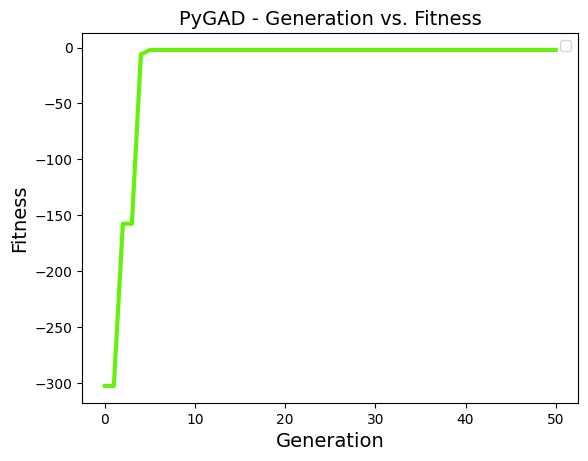

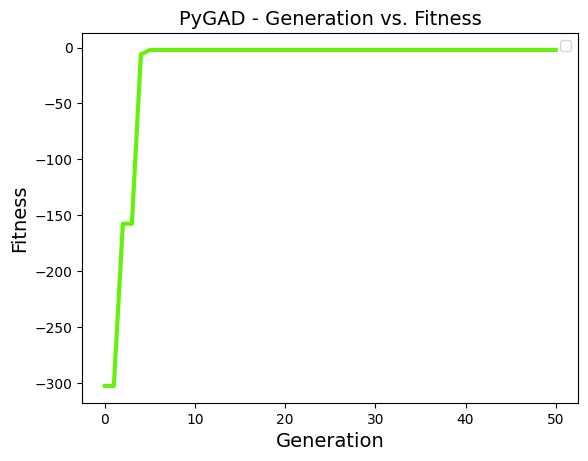

In [4]:
ga_instance.plot_fitness()

In [5]:
# lp_instance = LP(orders,roll,tuning_value).run()